# Case 5


By Claudia, Lotte, and André

In [30]:
using DataFrames, Distributions, GLM, HypothesisTests, MarketData, Plots, TimeSeries, LinearAlgebra, Random, Statistics
println("Packages loaded!")

# Question 1  
# -> Exercise 4.4 in the book
# For answers. See notebook!

Packages loaded!


## Question 1
Exercise 4.4 in the book. For answers $\rightarrow$ see notebook!

### Beta distribution

$$
\begin{split}
L(\theta | x_{i}) &= \Pi_{i = 1}^{N} \theta x^{\theta - 1}
\\
l(\theta | x_{i}) &= \sum_{i = 1}^{N} \ln{\theta} + (\theta - 1) \ln{x}
\\
&= n \ln{\theta} + \theta \sum_{i = 1}^{N} \ln{x_{i}} - \sum_{i = 1}^{N} \ln{x_{i}}
\\
\frac{d l(\theta | x_{i})}{d \theta} &= \frac {n}{\theta} + \sum_{i = 1}^{N} \ln{x_{i}} \overset{s}{=} 0
\\
\hat{\theta} &= - \frac{n}{\sum_{i = 1}^{N} \ln{x_{i}}}
\\
\frac{d l(\theta | x_{i})}{d^{2} \theta} &= \frac {- n}{\theta^{2}} \lt 0 \implies \max
\end{split}
$$

### Pareto distribution

$$
\hat{\theta} = \frac{n}{\sum_{i = 1}^{N} \ln{x_{i}}}
$$

### Gamma distribution

$$
\hat{\theta} = \frac{2n}{\sum_{i = 1}^{N} x_{i}}
$$

### Laplace distribution

$$
\hat{\theta} = \frac {n}{\sum_{i = 1}^{N} |x_{i}|}
$$

## Question 2

In [107]:
# Question 2
# Chose the Pareto Distribution
# To get the formula in the book:
# set Pareto.alpha = theta (in the book)
# set Pareto.theta = 1

# ----
n = 250
theta = 3
x = rand(Pareto(theta, 1), n)

lnx = log.(x)

n / sum(lnx)

In [106]:
# Exercise 2
# From Lotte

n = 250
range = 0.01:0.01:5
lnL = []

for θ in range
    x = rand(Pareto(θ, 1), n)

    logL = n * log(θ) - (θ + 1) * sum(log.(x))
    push!(lnL, logL)
end

maxIndex = argmax(lnL)
MLE = range[maxIndex]

4.98

## Question 3

In [32]:
function OLS(y, X)

    beta = inv(X'X)X'y
    yHat = X * beta
    e = y - (X * beta) 

    return(beta = beta, yHat = yHat, e = e)
    
end

OLS (generic function with 1 method)

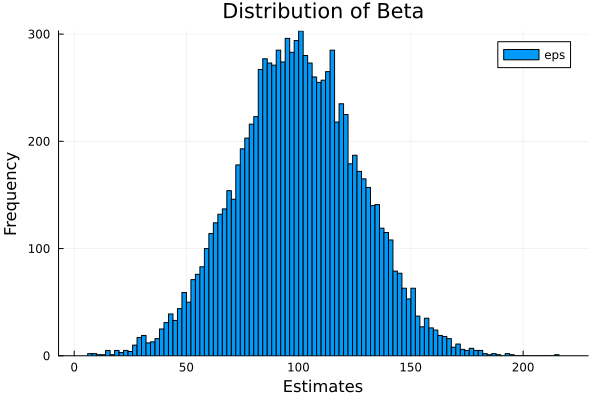

In [33]:
# Question 3
Random.seed!(10)

n = 100
beta = [500; 100]
iota = ones(n)
educ = rand(Uniform(0, 5), n)
eps = rand(Normal(0, 400), n)
X = [iota educ]

T = 10000
estimates = zeros(T)

for i in 1:T

    # educ = rand(Uniform(0, 5), n)
    eps = rand(Normal(0, 400), n)
    # X = [iota educ]
    wage = X*beta .+ eps

    estimates[i] = OLS(wage, X).beta[2]
end

# Histogram of estimated beta
Plot1 = histogram(estimates, 
xlabel = "Estimates", ylabel = "Frequency",
title = "Distribution of Beta", label = "eps")



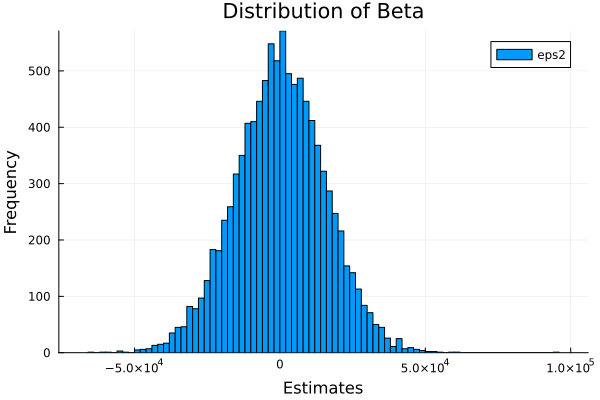

In [35]:
# Question 3
Random.seed!(10)

for i in 1:T

    # educ = rand(Uniform(0, 5), n)
    eps = rand(Normal(0, 400), n)
    eps2 = eps .^ 2
    # X = [iota educ]
    wage = X*beta .+ eps2

    estimates[i] = OLS(wage, X).beta[2]
end

# Histogram of estimated beta
Plot2 = histogram(estimates, 
xlabel = "Estimates", ylabel = "Frequency",
title = "Distribution of Beta", label = "eps2")


## Question 4

In [93]:
# Bootstrap
function Bootstrap(N = 499)

    n = 100
    iota = ones(n)
    educ = rand(Uniform(0, 5), n)
    eps = rand(Normal(0, 400), n)
    X = [iota educ]
    beta = [500; 100]
    wage = X*beta .+ eps
    
    bootstrap = zeros(N)

    for i in 1:N

        # Resample
        bootError = sample(eps, n, replace = true)
        bootWage = X * beta + bootError

        bootstrap[i] = OLS(bootWage, X).beta[2]
    end

    meanBoot = mean(bootstrap)
    se = sqrt(mean(bootstrap .^ 2) - mean(bootstrap) ^ 2)
    plot = histogram(bootstrap, xlabel = "beta", ylabel = "Frequencey",
    title = "Histogram of beta")

    println("Mean:", meanBoot)
    println("Std Err:", se)

    return(plot)
end

Bootstrap (generic function with 4 methods)

Mean:100.26970513686732
Std Err:24.70424483498846


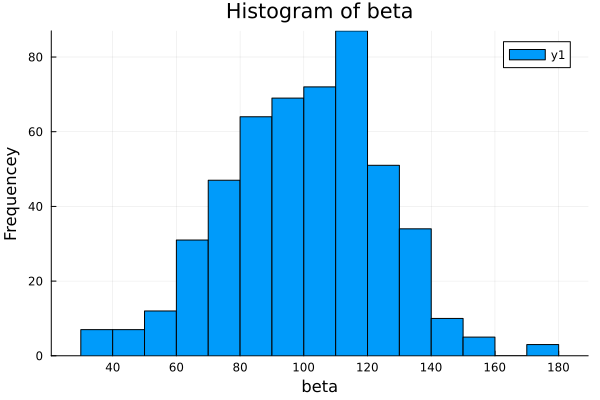

In [94]:
# Exercise 4
Random.seed!(10)

Bootstrap(499)

In [9]:
# Question 4
Random.seed!(10)

n = 100
beta = [500; 100]
iota = ones(n)
educ = rand(Uniform(0, 5), n)
eps = rand(Normal(0, 400), n)
X = [iota educ]
wage = X*beta .+ eps
residuals = OLS(wage, X).e

println("Estimated Coefficent:", OLS(wage, X).beta[2])

Estimated Coefficent:93.14385974860136


100.01348525684355
1.2352122417515583


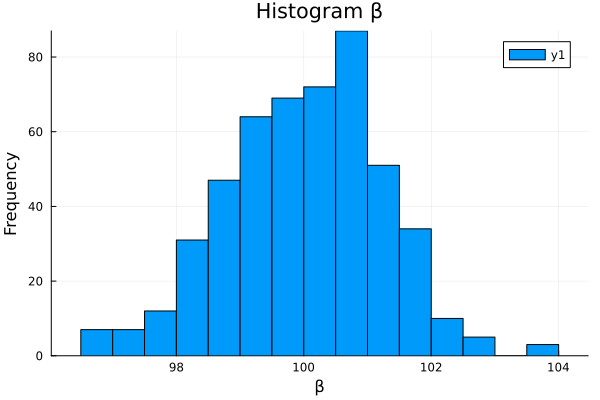

In [66]:
# From Lotte

Random.seed!(10)

# First replication
n = 100
ι = ones(n)
educ = rand(Uniform(0, 5), n)
error = rand(Normal(0, 20), n)
X = [ι educ]
β = [500; 100]
wage = X*β + error
Result_OLS = OLS(wage, X).beta

replications = 499
β_results_Bootstrap = zeros(2, replications)

for i in 1:replications

    #Resample residuals
    resampled_error = sample(error, 100, replace=true)

    #Reestimate wage
    reestimated_wage = X*β + resampled_error

    #Reestimate parameters
    Result_OLS_Bootstrap = OLS(reestimated_wage, X)
    β_results_Bootstrap[:, i] = Result_OLS_Bootstrap.beta
end

mean_Bootstrap = (1/replications)*sum(β_results_Bootstrap[2, 1:replications])
println(mean_Bootstrap)
se_Bootstrap = sqrt( ((1/replications)*sum(β_results_Bootstrap[2, 1:replications].^2)) - ((1/replications)*sum(β_results_Bootstrap[2, 1:replications]))^2)
println(se_Bootstrap)
histogram(β_results_Bootstrap[2, 1:replications], xlabel="β", ylabel="Frequency", title="Histogram β")

## Question 5

In [45]:
# Question 5
alpha = 0.5
rho = 0.8
n = 10
rep = 10000

10000

In [46]:
# Exercise 5
epsilon = zeros(n, rep)

for i in 1:rep
    epsilon[:, i] = rand(Normal(0, 1), n)
end

epsilon

10×10000 Matrix{Float64}:
  1.59093   -1.0952    -0.37156    …  -0.164367  -0.00423496  -0.390153
 -0.949892   0.177501  -1.36819        0.995897  -0.56288     -1.58223
 -0.329134  -1.90319   -0.325119      -0.426883   0.176119     0.460415
  1.43796    0.142729  -0.0591994      0.492648   0.124187     0.208242
  1.48405   -0.163659  -0.168321      -1.04446    0.0857533   -0.160717
 -0.725087  -1.09736   -0.0723781  …  -1.18612    0.558421    -1.87506
 -0.242074   0.612728   0.5009         0.165977  -0.210127     0.716981
  0.681391   0.464048   0.161535      -1.87235   -0.765682    -0.134311
  0.53264   -0.323578   1.50883       -1.43377   -1.05236     -0.277646
  0.530218  -0.197407  -1.56521       -1.23237    0.342227     1.24217

In [47]:
# Exercise 5
yt = zeros(n, rep)

for r in 1:rep
    for i in 2:n

    yt[i, r] = alpha .+ rho .* yt[i-1, r] .+ epsilon[i - 1, r]
    end
end

yt

10×10000 Matrix{Float64}:
 0.0       0.0         0.0        0.0       …   0.0       0.0        0.0
 2.09093  -0.5952      0.12844    2.16961       0.335633  0.495765   0.109847
 1.22285   0.201341   -0.765434   3.21954       1.7644    0.333732  -0.994355
 1.14915  -1.24212    -0.437466   3.90998       1.48464   0.943105   0.164931
 2.85728  -0.350968    0.0908278  3.42978       2.18036   1.37867    0.840187
 4.26987   0.0555666   0.404341   0.79859   …   1.19983   1.68869    1.01143
 3.19081  -0.552903    0.751095   0.874527      0.273738  2.40937   -0.565912
 2.81058   0.670405    1.60178    0.896275      0.884967  2.21737    0.764251
 3.42985   1.50037     1.94296    2.52478      -0.664373  1.50822    0.97709
 3.77652   1.37672     3.56319    2.95859      -1.46527   0.65421    1.00403

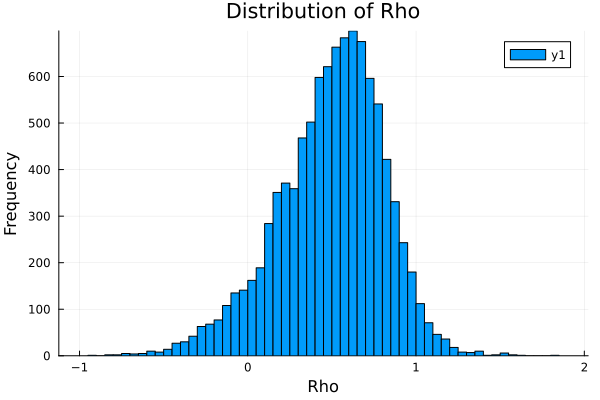

In [58]:
# Exercise 5
rhoEstimate = zeros(rep)

for i in 1:rep

    rhoEstimate[i] = OLS(yt[2:end, i], [ones(n - 1) yt[1:end - 1, i]]).beta[2]
end

# Histogram of estimated beta
Plot4 = histogram(rhoEstimate,
xlabel = "Rho", ylabel = "Frequency",
title = "Distribution of Rho")

In [59]:
function q5(n = 10, rep = 10000)

    alpha = 0.5
    rho = 0.8

    epsilon = zeros(n, rep)

    for i in 1:rep
    epsilon[:, i] = rand(Normal(0, 1), n)
    end

    yt = zeros(n, rep)

    for r in 1:rep
        for i in 2:n

    yt[i, r] = alpha .+ rho .* yt[i-1, r] .+ epsilon[i - 1, r]
        end
    end

    rhoEstimate = zeros(rep)

    for i in 1:rep

    rhoEstimate[i] = OLS(yt[2:end, i], [ones(n - 1) yt[1:end - 1, i]]).beta[2]
    end

    # Histogram of estimated beta
    Plot = histogram(rhoEstimate,
    xlabel = "Rho", ylabel = "Frequency",
    title = "Distribution of Rho")

    return(Plot)
    
end

q5 (generic function with 3 methods)

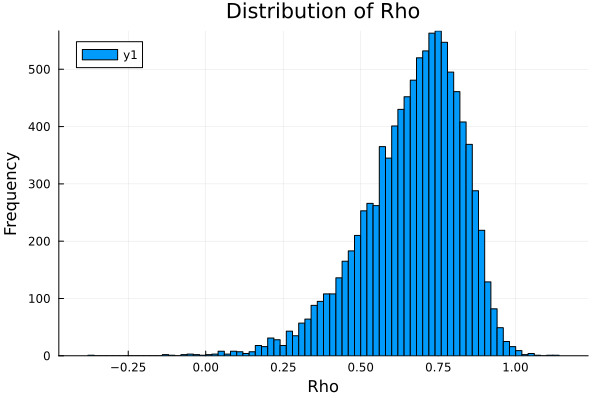

In [60]:
# Exercise 5
q5(25)

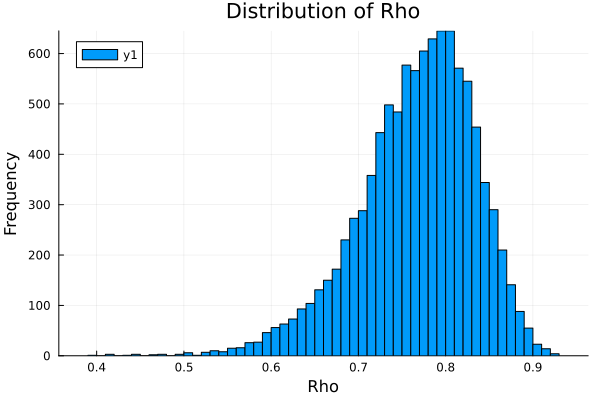

In [61]:
# Exercise 5
q5(100)

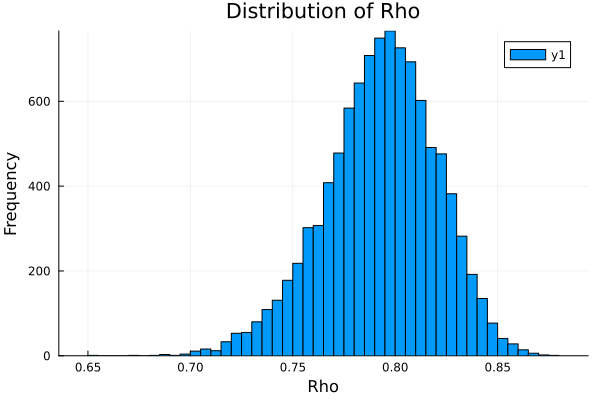

In [62]:
# Exercise 5

q5(500)

We see that as the sample size increases, the better we locate the true value of $\rho = 0.8$.

## Question 6

1. a
2. c
3. e